<a href="https://colab.research.google.com/github/lmlucania/TensorFlow/blob/master/%E7%8A%AC%E7%8C%AB%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip show tensorflow

Name: tensorflow
Version: 2.3.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: grpcio, tensorboard, opt-einsum, h5py, tensorflow-estimator, wheel, keras-preprocessing, protobuf, astunparse, wrapt, six, scipy, google-pasta, absl-py, termcolor, gast, numpy
Required-by: fancyimpute


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
%cd /content/drive/My Drive/cats_and_dogs
%ls

/content/drive/My Drive/cats_and_dogs
train/  validation/


In [ ]:
train_dir = "/content/drive/My Drive/cats_and_dogs/train"
validation_dir = "/content/drive/My Drive/cats_and_dogs/validation"

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
num_batches = 100

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(128, 128),
        batch_size=num_batches,
        class_mode="binary"
)
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(128, 128),
        batch_size=50,
        class_mode="binary"
)

Found 2000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
img_input = layers.Input(shape=(128, 128, 3))
x = layers.Conv2D(16, 3, activation="relu")(img_input)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(32, 3, activation="relu")(img_input)
x = layers.MaxPool2D(2)(x)
x = layers.Conv2D(64, 3, activation="relu")(img_input)
x = layers.MaxPool2D(2)(x)

In [ ]:
x = layers.Flatten()(x)
x = layers.Dense(512, activation="relu")(x)
output = layers.Dense(1, activation="sigmoid")(x)
model = Model(img_input, output)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 254016)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               130056704 
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 513       
Total params: 130,059,009
Trainable params: 130,059,009
Non-trainable params: 0
________________________________________

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(loss="binary_crossentropy",
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=20,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=10,
    verbose=2
    )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
20/20 - 10s - loss: 11.2518 - acc: 0.5000 - val_loss: 2.0198 - val_acc: 0.5000
Epoch 2/20
20/20 - 10s - loss: 0.9088 - acc: 0.5540 - val_loss: 0.6528 - val_acc: 0.6260
Epoch 3/20
20/20 - 9s - loss: 0.5673 - acc: 0.7375 - val_loss: 0.6141 - val_acc: 0.6660
Epoch 4/20
20/20 - 9s - loss: 0.4072 - acc: 0.8580 - val_loss: 0.6271 - val_acc: 0.6480
Epoch 5/20
20/20 - 9s - loss: 0.2519 - acc: 0.9245 - val_loss: 0.6378 - val_acc: 0.6600
Epoch 6/20
20/20 - 9s - loss: 0.1408 - acc: 0.9700 - val_loss: 0.7127 - val_acc: 0.6460
Epoch 7/20
20/20 - 9s - loss: 0.0737 - acc: 0.9915 - val_loss: 0.9204 - val_acc: 0.6540
Epoch 8/20
20/20 - 9s - loss: 0.0349 - acc: 0.9975 - val_loss: 0.8605 - val_acc: 0.6660
Epoch 9/20
20/20 - 9s - loss: 0.0152 - acc: 0.9995 - val_loss: 0.9546 - val_acc: 0.6760
Epoch 10/20
20/20 - 9s - loss: 0.0070 - acc: 1.0000 - val_loss: 1.0120 - val_acc: 0.6740
Epoch 11/20
20/20 - 9s - loss: 0.0037 - 

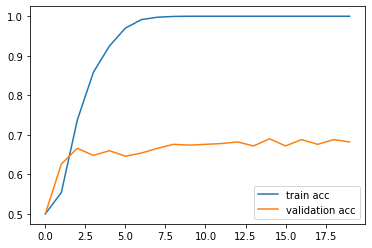

In [ ]:
import matplotlib.pyplot as plt
accs = history.history["acc"]
val_accs = history.history['val_acc']
losses = history.history["loss"]
val_losses = history.history["val_acc"]
plt.plot(accs, label="train acc")
plt.plot(val_accs, label="validation acc")
plt.legend()


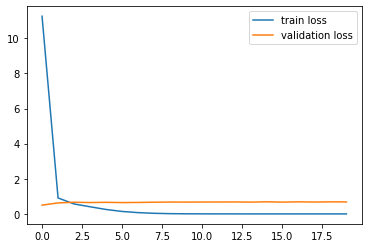

In [ ]:
plt.plot(losses, label="train loss")
plt.plot(val_losses, label="validation loss")
plt.legend()